In [6]:
from scipy.spatial import distance_matrix
import pandas

In [7]:
data=pandas.read_csv(r"D:\Estudiar\Python\MLData\movies\movies.csv",sep=";")
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [8]:
movies=data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [9]:
dd1=distance_matrix(data[movies],data[movies],p=1)
dd2=distance_matrix(data[movies],data[movies],p=2)
dd10=distance_matrix(data[movies],data[movies],p=10)

In [10]:
def dm_to_df(dd,col_names):
    import pandas
    return pandas.DataFrame(dd,index=col_names,columns=col_names)


In [11]:
dm_to_df(dd1,data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

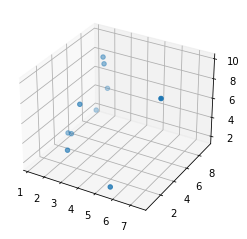

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(xs=data["star_wars"],ys=data["lord_of_the_rings"],zs=data["harry_potter"])

In [14]:
#Enlaces 

In [15]:
df=dm_to_df(dd1,data["user_id"])

In [16]:
Z=[]
df[11]=df[1]+df[10]
df.loc[11]=df.loc[1]+df.loc[10]
Z.append([1,10,0.7,2]) #id1, id2, d, n_el numero de elementos en el cluster
df 

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [17]:
for i in df.columns.values.tolist():
    df.loc[11][i]=min(df.loc[1][i],df.loc[10][i])
    df.loc[i][11]=df.loc[11][i]
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [18]:
df=df.drop([1,10])
df=df.drop([1,10],axis=1)
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [19]:
x=2
y=7
n=12

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #id1, id2, d, n_el numero de elementos en el cluster

for i in df.columns.values.tolist():
    df.loc[n][i]=min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n]=df.loc[n][i]
df

df=df.drop([x,y])
df=df.drop([x,y],axis=1)

In [20]:
x=5
y=8
n=13

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #id1, id2, d, n_el numero de elementos en el cluster

for i in df.columns.values.tolist():
    df.loc[n][i]=min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n]=df.loc[n][i]
df

df=df.drop([x,y])
df=df.drop([x,y],axis=1)

In [21]:
x=11
y=13
n=14

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #id1, id2, d, n_el numero de elementos en el cluster

for i in df.columns.values.tolist():
    df.loc[n][i]=min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n]=df.loc[n][i]
df

df=df.drop([x,y])
df=df.drop([x,y],axis=1)

In [22]:
df

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


In [23]:
x=9
y=12
z=14
n=15

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],3]) #id1, id2, d, n_el numero de elementos en el cluster

for i in df.columns.values.tolist():
    df.loc[n][i]=min(df.loc[x][i],df.loc[y][i],df.loc[z][i])
    df.loc[i][n]=df.loc[n][i]
df

df=df.drop([x,y,z])
df=df.drop([x,y,z],axis=1)

In [24]:
df

user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


In [25]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 12, 11.7, 3]]

In [26]:
#Clustering jerarquico

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
Z=linkage(data[movies],"ward")

In [29]:
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [45.0, 45.0, 71.25, 71.25],
  [20.0, 20.0, 58.125, 58.125]],
 'dcoord': [[0.0, 0.6164414002968973, 0.6164414002968973, 0.0],
  [0.0, 2.16794833886788, 2.16794833886788, 0.0],
  [0.6164414002968973, 6.664082832618455, 6.664082832618455, 2.16794833886788],
  [0.0, 3.4828149534535995, 3.4828149534535995, 0.0],
  [0.0, 0.412310562561766, 0.412310562561766, 0.0],
  [0.0, 5.294336596779619, 5.294336596779619, 0.412310562561766],
  [3.4828149534535995,
   6.593178292750774,
   6.593178292750774,
   5.294336596779619],
  [0.0, 10.623558725775464, 10.623558725775464, 6.593178292750774],
  [6.664082832618455,
   12.815693504449923,
   12.815693504449923,
   10.623558725775464]],
 'ivl': ['1', '6', '4', '7', '2', '3', '8', '5', '0', '9'],
 'leaves': [1, 6, 4, 7, 2, 3, 8, 5, 0, 9],
 'color_list'

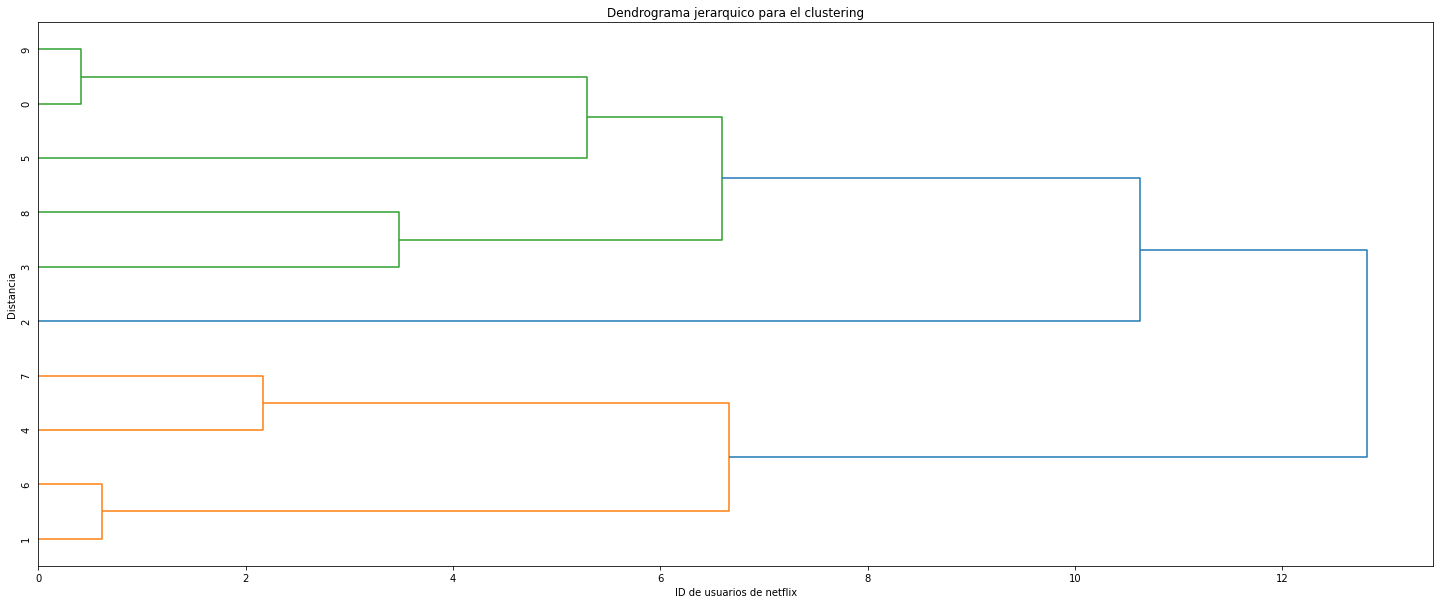

In [33]:
Z=linkage(data[movies],"ward")
plt.figure(figsize=(25,10))
plt.title("Dendrograma jerarquico para el clustering")
plt.xlabel("ID de usuarios de netflix")
plt.ylabel("Distancia")
dendrogram(Z,leaf_rotation=90.,leaf_font_size=10)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [30.0, 30.0, 64.375, 64.375],
  [5.0, 5.0, 47.1875, 47.1875]],
 'dcoord': [[0.0, 0.6164414002968973, 0.6164414002968973, 0.0],
  [0.0, 2.16794833886788, 2.16794833886788, 0.0],
  [0.6164414002968973, 4.757729450078582, 4.757729450078582, 2.16794833886788],
  [0.0, 0.412310562561766, 0.412310562561766, 0.0],
  [0.0, 3.463557121658556, 3.463557121658556, 0.412310562561766],
  [0.0, 4.373316724391197, 4.373316724391197, 3.463557121658556],
  [0.0, 5.519840684452184, 5.519840684452184, 4.373316724391197],
  [4.757729450078582, 6.874967489885831, 6.874967489885831, 5.519840684452184],
  [0.0, 8.783052679824308, 8.783052679824308, 6.874967489885831]],
 'ivl': ['2', '1', '6', '4', '7', '3', '5', '8', '0', '9'],
 'leaves': [2, 1, 6, 4, 7, 3, 5, 8, 0, 9],
 'color_list': ['C1', 'C1', 'C1',

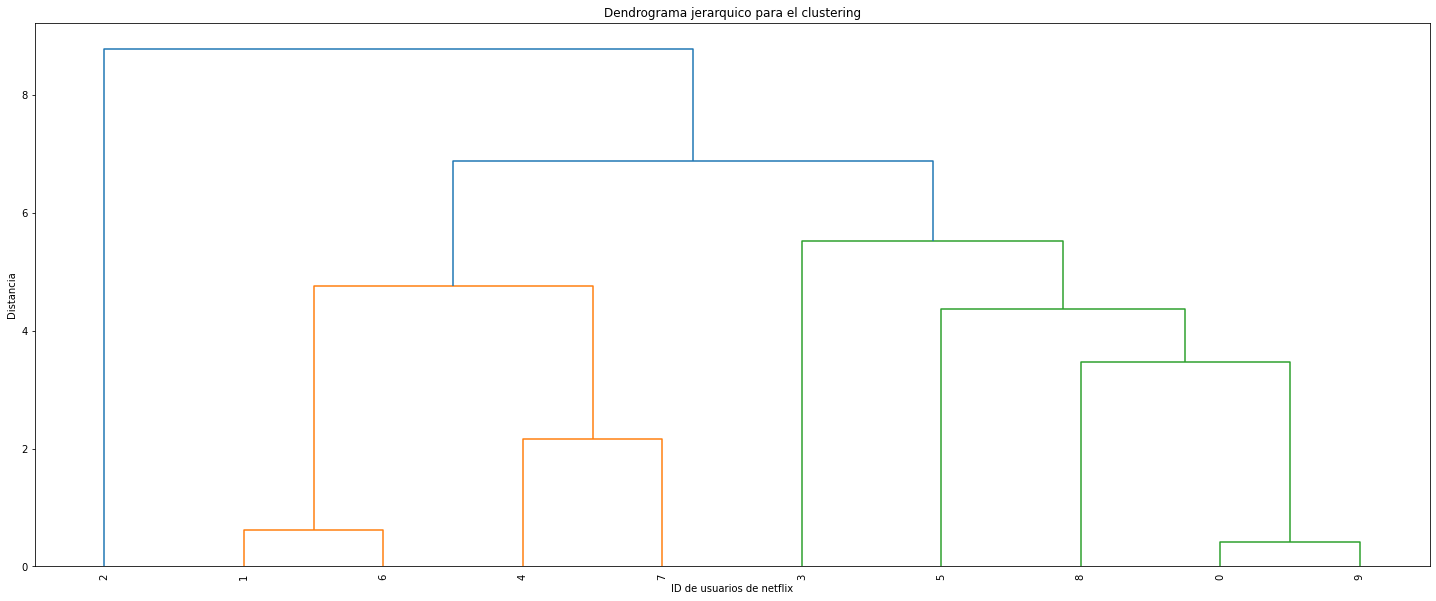

In [35]:
Z=linkage(data[movies],"average")
plt.figure(figsize=(25,10))
plt.title("Dendrograma jerarquico para el clustering")
plt.xlabel("ID de usuarios de netflix")
plt.ylabel("Distancia")
dendrogram(Z,leaf_rotation=90.,leaf_font_size=10)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [45.0, 45.0, 71.25, 71.25],
  [30.0, 30.0, 58.125, 58.125],
  [15.0, 15.0, 44.0625, 44.0625],
  [5.0, 5.0, 29.53125, 29.53125]],
 'dcoord': [[0.0, 0.6164414002968973, 0.6164414002968973, 0.0],
  [0.0, 2.16794833886788, 2.16794833886788, 0.0],
  [0.0, 0.412310562561766, 0.412310562561766, 0.0],
  [0.0, 3.293933818400121, 3.293933818400121, 0.412310562561766],
  [2.16794833886788,
   3.4496376621320683,
   3.4496376621320683,
   3.293933818400121],
  [0.0, 3.4828149534535995, 3.4828149534535995, 3.4496376621320683],
  [0.6164414002968973,
   3.6180105030251095,
   3.6180105030251095,
   3.4828149534535995],
  [0.0, 3.9458839313897713, 3.9458839313897713, 3.6180105030251095],
  [0.0, 6.0049979184009725, 6.0049979184009725, 3.9458839313897713]],
 'ivl': ['2', '5', '1', '6', '3', '4', '7', '8', '0', '9'],
 'leaves': [2, 5, 1, 6, 3, 4, 7, 8, 

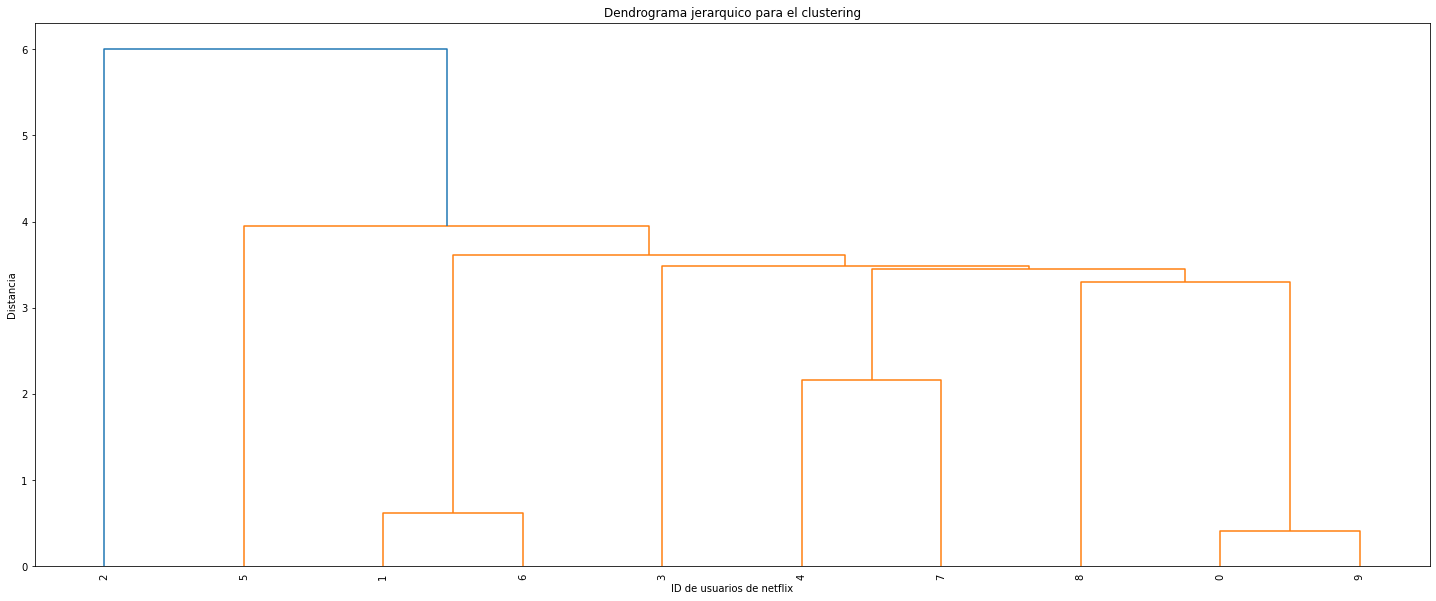

In [36]:
Z=linkage(data[movies],"single")
plt.figure(figsize=(25,10))
plt.title("Dendrograma jerarquico para el clustering")
plt.xlabel("ID de usuarios de netflix")
plt.ylabel("Distancia")
dendrogram(Z,leaf_rotation=90.,leaf_font_size=10)